In [15]:
# 0. Add project root to Python path
import sys
import os
sys.path.append(os.path.abspath(".."))  # lets Python find segmentation folder

In [16]:
# 1. Imports and Load Data
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# 2. Import your custom modules from segmentation
from segmentation.preprocess import create_rfm
from segmentation.cluster import run_kmeans
from segmentation.visualize import cluster_scatter


df = pd.read_excel("../data/transactions.xlsx", engine='openpyxl')

In [8]:
# 2. Basic Inspection
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# 3. Data Cleaning Checks
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df = df.dropna(subset=['CustomerID'])

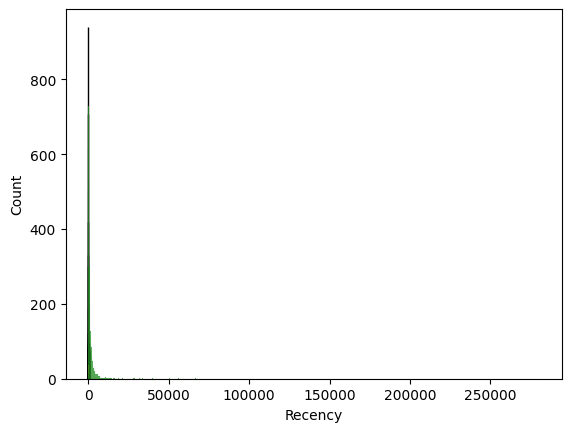

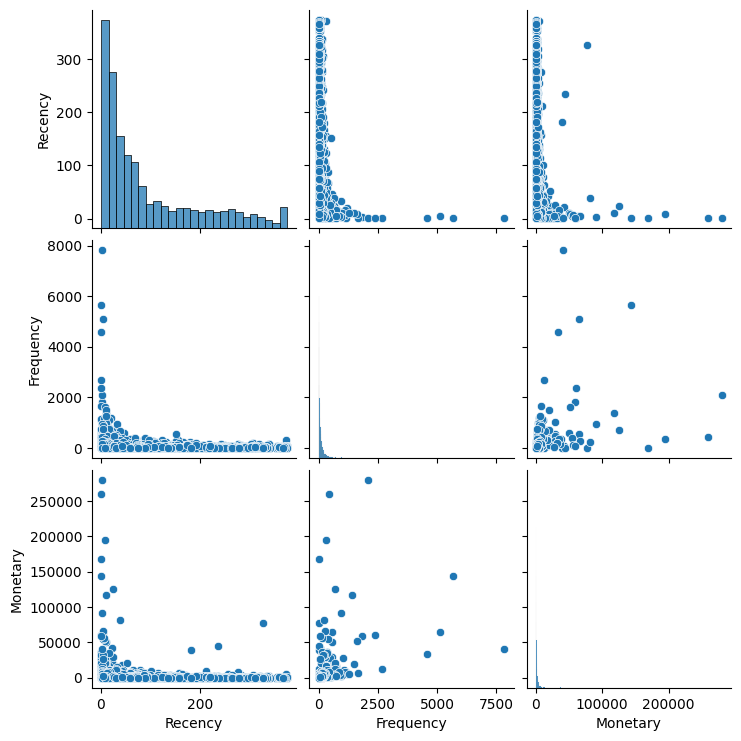

In [14]:
# Remove cancelled or negative quantity orders
df = df[df['Quantity'] > 0]

# Create Amount column = Quantity * UnitPrice
df['Amount'] = df['Quantity'] * df['UnitPrice']

# Now you can filter by Amount if needed
df = df[df['Amount'] > 0]

df_clean = df[['CustomerID', 'InvoiceDate', 'Amount']].copy()

# Check
df_clean.head()

# 4. RFM Feature Engineering
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,
    'CustomerID': 'count',
    'Amount': 'sum'
}).rename(columns={'InvoiceDate':'Recency','CustomerID':'Frequency','Amount':'Monetary'})

# 5. EDA Visualization
sns.histplot(rfm['Recency'])
sns.histplot(rfm['Frequency'])
sns.histplot(rfm['Monetary'])
sns.pairplot(rfm)